Decision trees

1. What is being optimized?

At each split, the algorithm chooses:
- a feature
- a threshold

that maximally reduces impurity

📌 Impurity (Classification)
Common choices:
Let $p_k$ be the proportion of class k in a node.

🔹 Gini impurity
\begin{align*}
G=1-\sum_{k}p_k^2
\end{align*}
🔹 Entropy
\begin{align*}
H=-\sum_k p_klog p_k
\end{align*}

Both measure class heterogeneity inside a node.
- Pure node -> impurity = 0
- Mixed node -> impurity high

📌What the split maximizes
The algorithm maximizes:

\begin{align*}
I_p - \left(
\frac{n_L}{n} I_L
+
\frac{n_R}{n} I_R
\right)
\end{align*}


2. What happens at a node?

At each node:
(1) Try all features
(2) Try many thresholds
(3) Compute impurity reduction
(4) Pick the best one

It is a greedy algorithm: makes the best local decision and no global optimization

3. Bias-Variance Behavior

- Shallow tree -> high bias, low variance
- Deep tree -> low bias, high variance

Trees are unstable: small data change -> different tree

That's why Random Forest works well.

Regularization = limiting structure, not penalizing coefficients

4. What makes trees powerful?

They:
- Handle nonlinear boundaries 
   - Effects depend on region of feature space
   - Features can influence prediction differently at different depth
   - There is no single monotonic effect
   - Trees model interactions automatically
   - Feature importance measures contribution to imputiry reduction, not direction

- Handle interactions automatically
- Need no feature scaling
- Handle mixed data types
- Work well with missing values (in some implementations)

🧠 One Level Deeper (Important Insight)

* Logistic regression: Global linear decision boundary

* Decision tree: Piecewise constant local decisions

Trees approximate complex shapes by stacking rectangles.

5. Classification trees and sociology
* Subgroup discovery
* Interaction detection
* Threshold effects
* Exploring complex inequality structures
* Early-stage exploratory research

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mglearn
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42,
                                                    stratify=cancer.target)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063


In [3]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


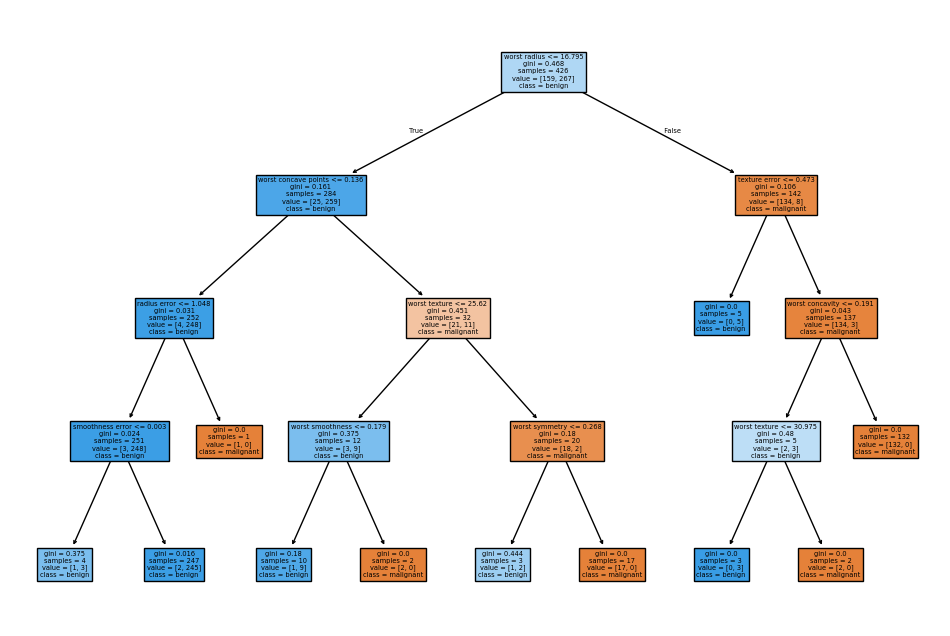

In [4]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(tree,
          feature_names=cancer.feature_names,
          class_names=cancer.target_names,
          filled=True)
plt.show()


([<matplotlib.axis.XTick at 0x14b1ab9e0>,
 [Text(0, 0, 'mean radius'),
  Text(1, 0, 'mean texture'),
  Text(2, 0, 'mean perimeter'),
  Text(3, 0, 'mean area'),
  Text(4, 0, 'mean smoothness'),
  Text(5, 0, 'mean compactness'),
  Text(6, 0, 'mean concavity'),
  Text(7, 0, 'mean concave points'),
  Text(8, 0, 'mean symmetry'),
  Text(9, 0, 'mean fractal dimension'),
  Text(10, 0, 'radius error'),
  Text(11, 0, 'texture error'),
  Text(12, 0, 'perimeter error'),
  Text(13, 0, 'area error'),
  Text(14, 0, 'smoothness error'),
  Text(15, 0, 'compactness error'),
  Text(16, 0, 'concavity error'),
  Text(17, 0, 'concave points error'),
  Text(18, 0, 'symmetry error'),
  Text(19, 0, 'fractal dimension error'),
  Text(20, 0, 'worst radius'),
  Text(21, 0, 'worst texture'),
  Text(22, 0, 'worst perimeter'),
  Text(23, 0, 'worst area'),
  Text(24, 0, 'worst smoothness'),
  Text(25, 0, 'worst compactness'),
  Text(26, 0, 'worst concavity'),
  Text(27, 0, 'worst concave points'),
  Text(28, 0, 'wor

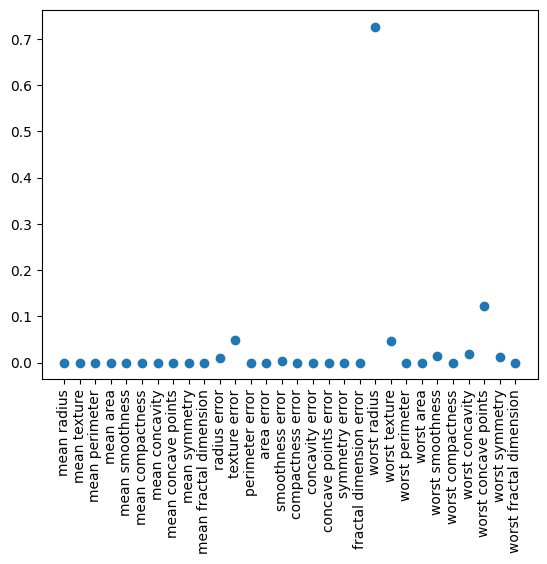

In [5]:
tree.feature_importances_
plt.plot(tree.feature_importances_, "o")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
